# Advanced Data Visualization with Seaborn 


## 1. Introduction

- **What is data visualization?**  
  Data visualization is the representation of data in a graphical or pictorial format. It helps people understand the significance of data by summarizing and presenting a huge amount of data in a clear and visual way.
  
- **Importance of data visualization:**  
  - Quickly convey concepts.
  - Easily identify patterns, trends, and outliers.
  - Make informed decisions based on data.
  




## 2. Setting up the Environment

### Installing required libraries:
To install the required libraries, you can use the following command:
```
!pip install matplotlib numpy pandas scikit-learn seaborn
```
(Note: This step is generally done outside the notebook, especially if you're using a virtual environment.)




# **Seaborn**
[<img src="https://seaborn.pydata.org/_images/logo-wide-lightbg.svg" width="250"/>](image.png)

Positives:
- ✔️ Standard plots out of the box
- ✔️ Perfect for statisical anaylsis.
- ✔️ Fast to use for standard plots

Negatives:
- ❌ Built on top of matplotlib
- ❌ Less ability to customize

### Most Commonly Used and Interesting:

* **Violin Plot**: Combines aspects of boxplots and KDE, providing a deeper understanding of the distribution of data.
* **Pair Plot**: Useful for exploring pairwise relationships in a dataset, especially when trying to quickly visualize and understand multi-dimensional data.
* **Joint Plot**: Combines scatter plots (or hexbin plots) with histogram, allowing for the study of the relationship between two variables.
* **LMPlot**: Combines regression plots with FacetGrid, useful for visualizing a linear relationship in datasets.
* **KDEPlot**: Kernel Density Estimation plots are used for visualizing the probability density of a continuous variable.
* **Swarm Plot**: It's a categorical scatter plot, which positions each point so that it avoids overlapping points. It gives a better representation of the distrubution of values

### Importing necessary modules and Loading datasets:

In [2]:

# Importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.stats import gaussian_kde
# Import necessary libraries
import seaborn as sns

## 3. Basic Plots

### 3.1. Violin Plot



**Introduction and Use-Cases:**  

A Violin Plot is used to visualize the distribution of the data and its probability density. This chart is a combination of a Box Plot and a Kernel Density Plot. Violin Plots have many advantages:ies.




**Basic line chart:**  
To start with, we'll create a basic line chart using synthetic data. We'll plot a sine wave, which is a mathematical curve that describes a smooth periodic oscillation

* They can show the full distribution of the data.
* They can represent the data's multimodal distribution (multiple peaks).
* They provide a visualization of the median and interquartile range of the data.

Common use-cases include comparing the distribution of a given variable across different categories.




**Basic Violin Plot**

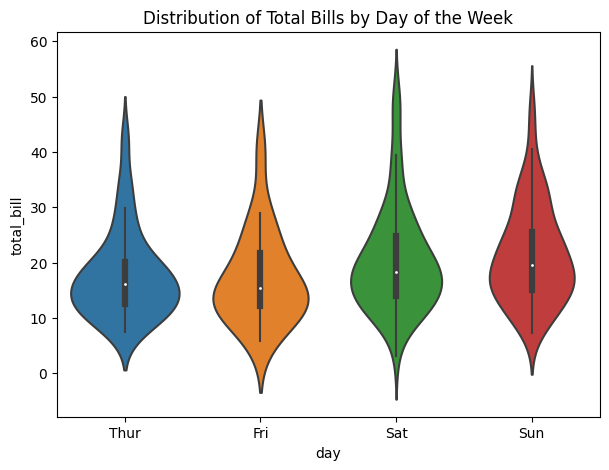

In [3]:
# Load the 'tips' dataset from Seaborn's sample datasets
tips = sns.load_dataset('tips')

# Create a basic violin plot
plt.figure(figsize=(7, 5))
sns.violinplot(x=tips["day"], y=tips["total_bill"])

# Set title and show the plot
plt.title("Distribution of Total Bills by Day of the Week")
plt.show()

**Customizing the Violin Chart**

Seaborn provides a variety of customization options for the violin plot. Let's explore some of them.

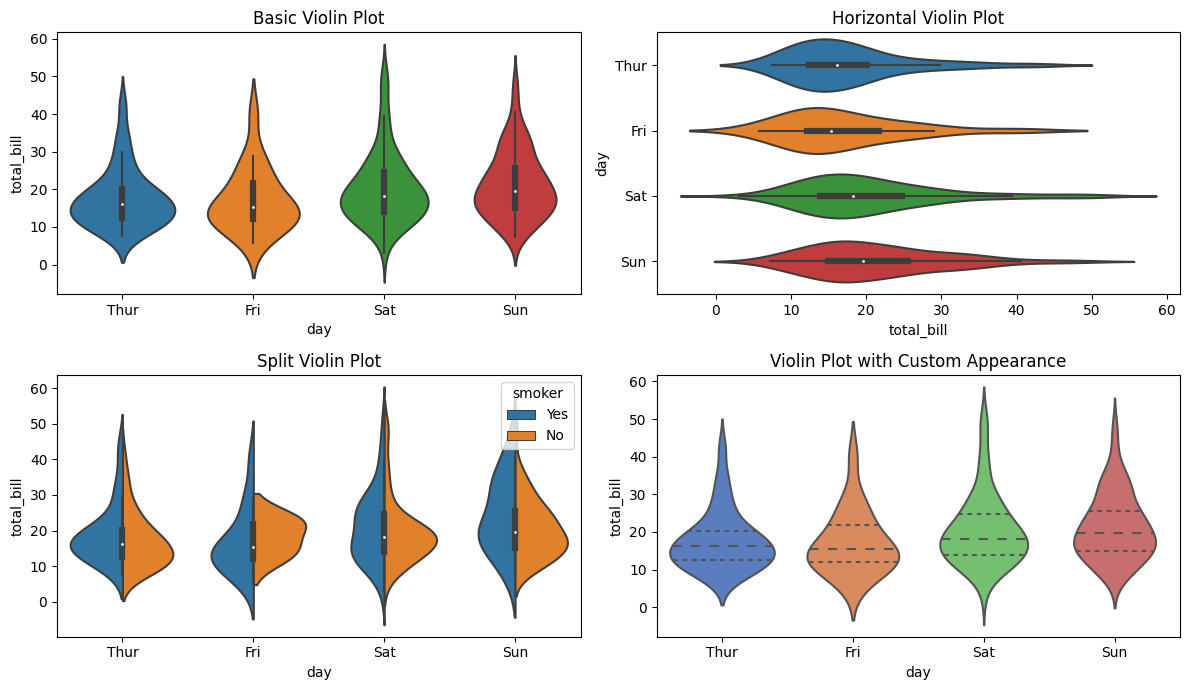

In [4]:
# Creating a 2x2 grid of subplots to place our violin plots
# 'figsize' sets the total size of the figure, ensuring each subplot is large enough for clear visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 7))

# Plot 1: Basic Violin
# This is the standard representation of the violin plot, showcasing the distribution of the 'total_bill' variable for each 'day'.
sns.violinplot(x=tips["day"], y=tips["total_bill"], ax=axes[0, 0])
axes[0, 0].set_title("Basic Violin Plot")

# Plot 2: Horizontal Violin
# By simply switching the x and y parameters, we can create a horizontal version of the violin plot. This might be useful in cases where horizontal representation is more intuitive.
sns.violinplot(x=tips["total_bill"], y=tips["day"], ax=axes[0, 1])
axes[0, 1].set_title("Horizontal Violin Plot")

# Plot 3: Split Violin
# For datasets with a binary categorical variable, the 'split' parameter can be used to create a violin plot that visually compares the two categories side by side.
# Here, we're comparing distributions of 'total_bill' for smokers vs. non-smokers for each 'day'.
sns.violinplot(x=tips["day"], y=tips["total_bill"], hue=tips["smoker"], split=True, ax=axes[1, 0])
axes[1, 0].set_title("Split Violin Plot")

# Plot 4: Custom Appearance Violin
# Seaborn allows for customization of the violin plot's appearance. 
# 'palette' dictates the color scheme. 
# 'inner' determines the representation inside the violin. Setting it to "quartile" shows the quartile lines inside the violin plot, providing additional distribution insights.
sns.violinplot(x=tips["day"], y=tips["total_bill"], palette="muted", inner="quartile", ax=axes[1, 1])
axes[1, 1].set_title("Violin Plot with Custom Appearance")

# 'tight_layout' automatically adjusts the spacing between subplots for a cleaner look.
plt.tight_layout()
plt.show()

### 3.. Pair Plot


**Introduction and Use-Cases:**  
Pair plots, often referred to as scatterplot matrices, are a great way to visualize pairwise relationships in a dataset. By using pair plots, we can immediately see:

* The distributions of single variables.
* Relationships between two variables.

They are particularly useful when you want to quickly explore relationships among multiple variables in your dataset.
Common use-cases include:

* Preliminary exploration of a dataset.
* Checking for linear relationships between variables.
* Visualizing data distributions for multiple variables simultaneously.  



**Basic Pair chart:**  
Let's begin by generating a simple pair plot to understand its capabilities.



/home/halimia/miniconda3/envs/tf_pip_gpu_tuto/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


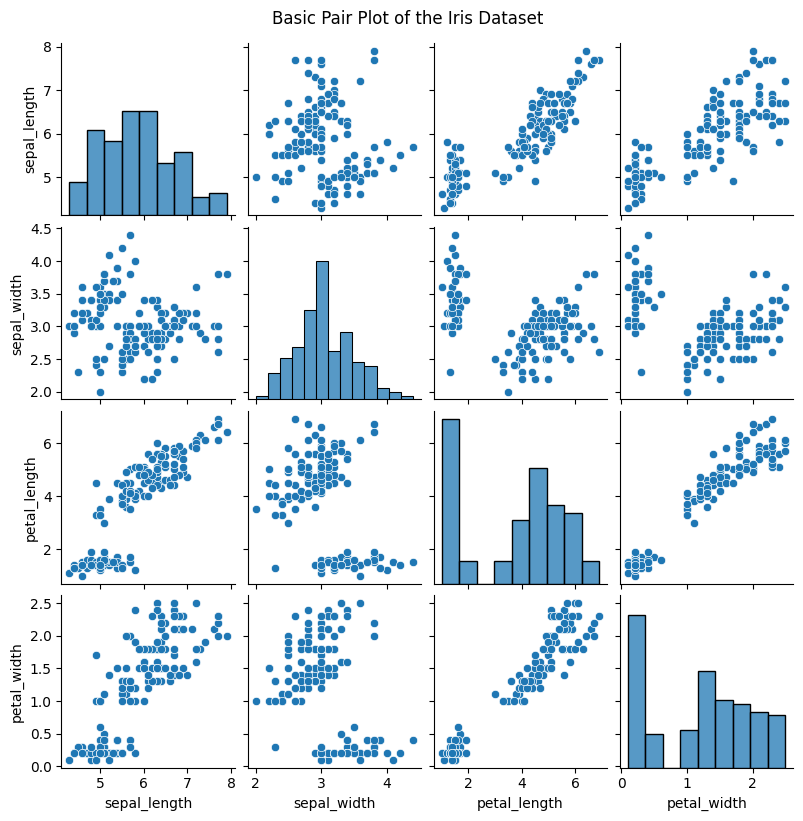

In [5]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Load the 'iris' dataset from Seaborn's sample datasets
iris = sns.load_dataset('iris')

# Create a basic pair plot
sns.pairplot(iris, height=2, aspect=1)  # height and aspect parameters control the size and aspect ratio of the facets

# The above code will automatically plot pairwise relationships for all numerical columns in the dataset.
# Additionally, the diagonal shows the distribution of the data for that particular column.

plt.suptitle("Basic Pair Plot of the Iris Dataset", y=1.02)  # Setting a title for the entire figure
plt.show()

Here, we've used the classic 'iris' dataset which contains measurements of various iris flower species. The pair plot provides insights into relationships between these measurements.



**Customizing the Pair chart:**  
Seaborn offers several ways to customize pair plots to derive more insights or to enhance their aesthetics.



**1. Pair Plot with Regression Lines**
    
Adding regression lines can give a quick estimate of the relationship between two variables.

/home/halimia/miniconda3/envs/tf_pip_gpu_tuto/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


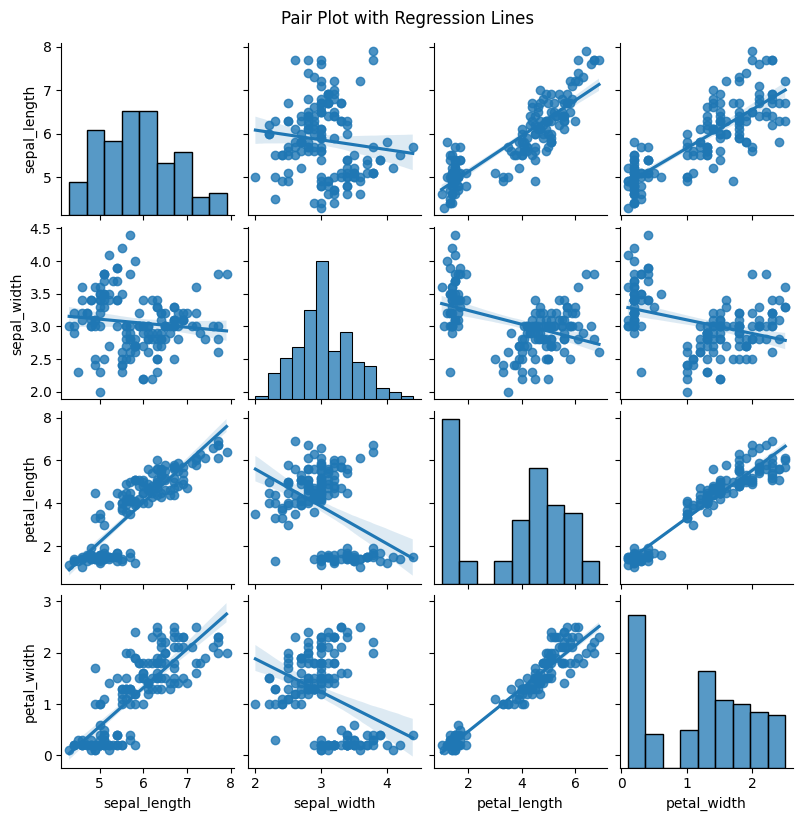

In [6]:
# Pair plot with regression lines
sns.pairplot(iris, height=2, aspect=1, kind="reg")
plt.suptitle("Pair Plot with Regression Lines", y=1.02)
plt.show()

**2. Pair Plot with Custom Color Palette**

You can customize the color palette based on a specific column (usually categorical).

/home/halimia/miniconda3/envs/tf_pip_gpu_tuto/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


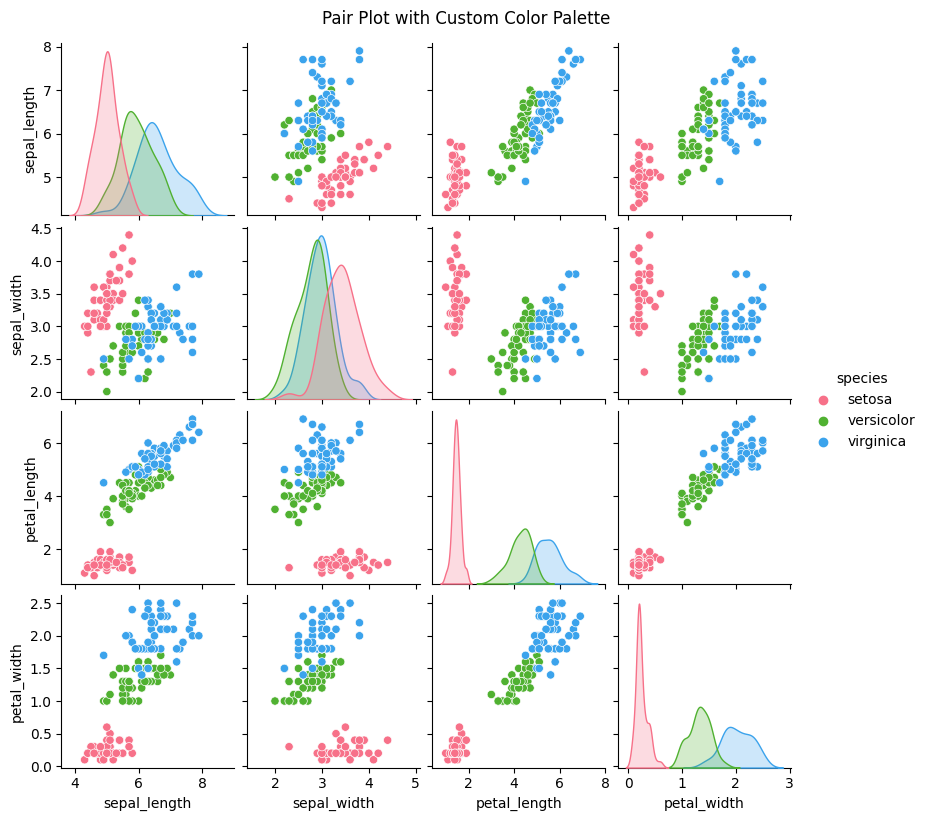

In [7]:
# Pair plot with custom color palette based on the 'species' column
sns.pairplot(iris,height=2, aspect=1, hue="species", palette="husl")
plt.suptitle("Pair Plot with Custom Color Palette", y=1.02)
plt.show()

**3. Pair Plot with Custom Markers**
    
Using different markers can be particularly helpful when distinguishing between categories in black and white prints.

/home/halimia/miniconda3/envs/tf_pip_gpu_tuto/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


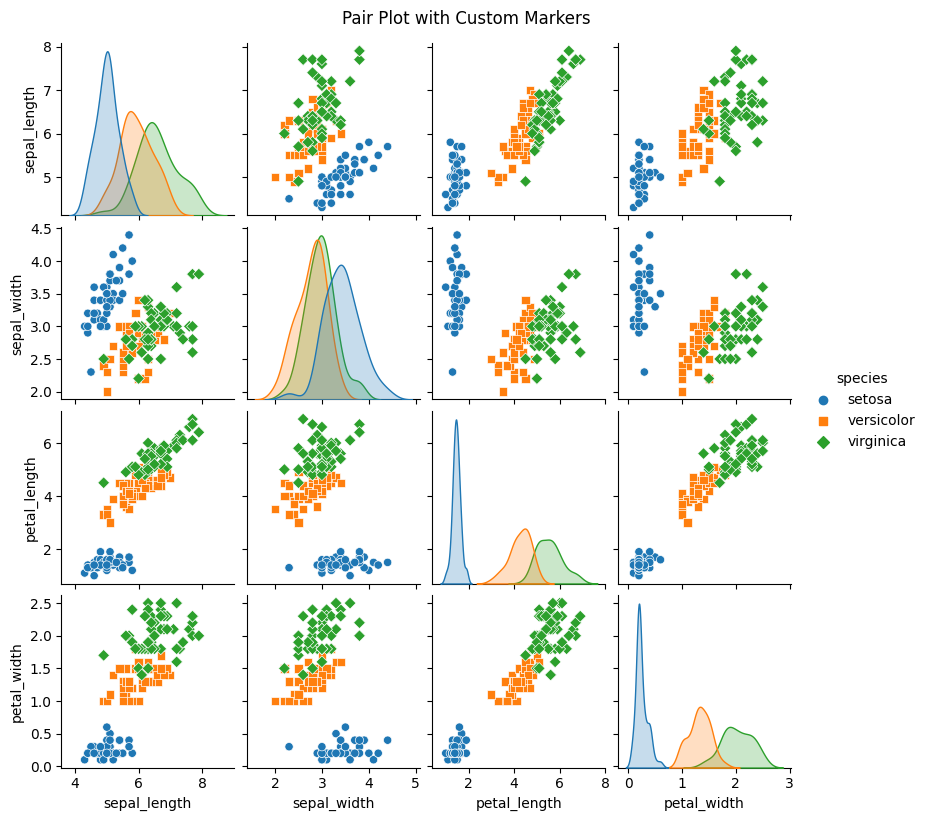

In [8]:
# Pair plot with custom markers
sns.pairplot(iris, height=2, aspect=1, hue="species", markers=["o", "s", "D"])
plt.suptitle("Pair Plot with Custom Markers", y=1.02)
plt.show()

### 3.3. Joint Plot

**Introduction and Use-Cases:**  
A Joint Plot allows for the visualization of the relationship between two variables by combining scatter plots, line plots, or hex plots with histogram plots. It's particularly useful for:

* Visualizing bivariate scatter plots along with univariate histograms in the same figure.
* Exploring potential relationships or correlations between two variables.
* Investigating the distributions of each variable individually.

**Basic Joint plot:**  
We'll start with a basic joint plot to visualize the relationship between two variables.



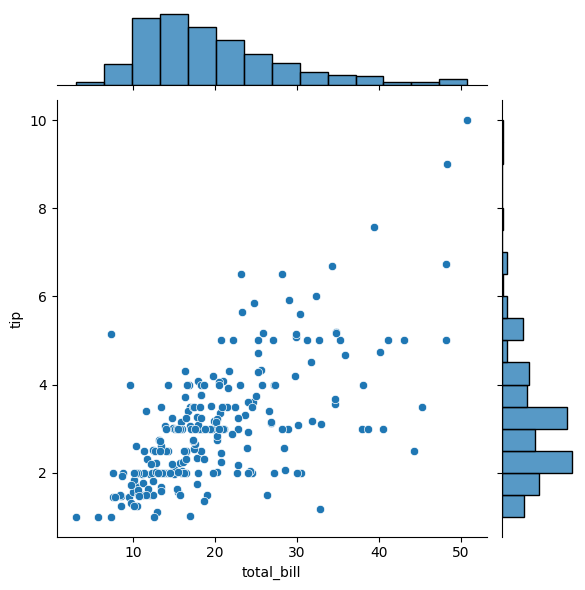

In [9]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Load the 'tips' dataset from Seaborn's sample datasets
tips = sns.load_dataset('tips')

# Create a basic joint plot between 'total_bill' and 'tip'
sns.jointplot(data=tips, x='total_bill', y='tip', kind='scatter')

# Display the plot
plt.show()

Here, we're visualizing the relationship between the total bill and the tip given. The histograms on the top and right sides show the distributions of the total bill and tip amounts, respectively.

**Customizing Joint plots:**

Seaborn provides multiple ways to customize joint plots. We'll explore some of the most common customizations using subplots for a side-by-side comparison.



These customizations highlight the versatility of joint plots in Seaborn. Depending on the data and the specific insights you're seeking, you can choose an appropriate style to visualize the relationship between two variables

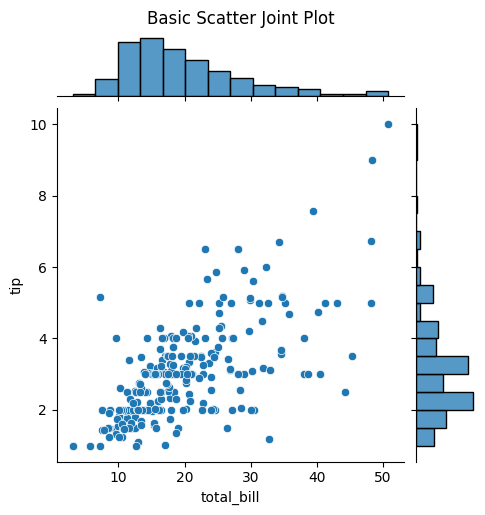

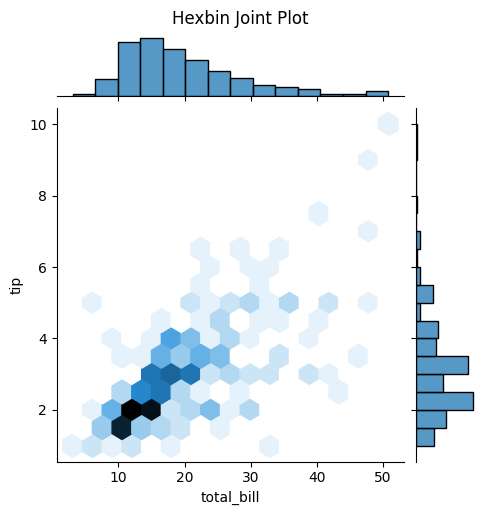

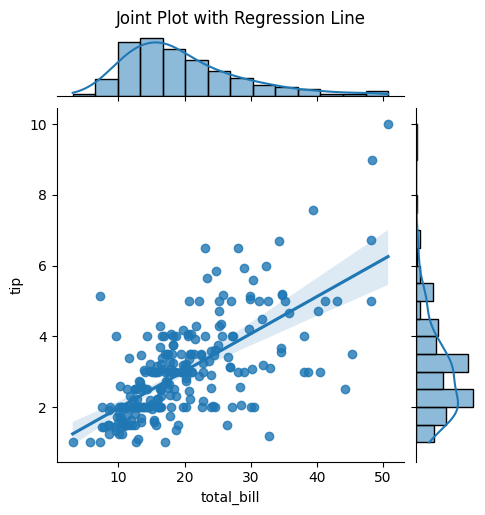

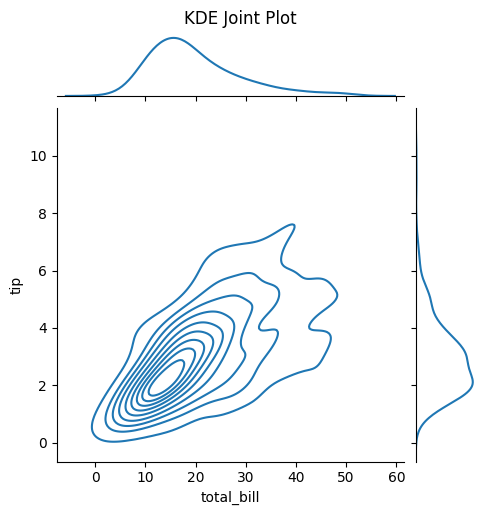

In [10]:
# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Joint Plot 1: Basic Scatter
g1 = sns.jointplot(data=tips, x='total_bill', y='tip', kind='scatter',height=5)
g1.fig.suptitle('Basic Scatter Joint Plot', y=1.02)

# Joint Plot 2: Hexbin Plot
g2 = sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex',height=5)
g2.fig.suptitle('Hexbin Joint Plot', y=1.02)

# Joint Plot 3: Regression Line
g3 = sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg',height=5)
g3.fig.suptitle('Joint Plot with Regression Line', y=1.02)

# Joint Plot 4: KDE
g4 = sns.jointplot(data=tips, x='total_bill', y='tip', kind='kde',height=5)
g4.fig.suptitle('KDE Joint Plot', y=1.02)

plt.show()

### 3.4. LMPlot  plot

**Introduction and Use-Cases:**

Lmplot is a figure-level function in Seaborn designed to fit and visualize a linear regression model to data. While it's built on top of regplot (an axes-level function for regression plots), lmplot adds facets, allowing you to easily create a grid of regression plots based on categorical variables.

Use-cases:

* Regression Analysis: To see the linear relationship between two numerical variables.
* Comparative Analysis: Analyzing linear trends across different categories.
* Outlier Detection: The regression line can help in spotting outliers in the data.

**Basic LMPlot plot**

The fundamental usage of lmplot is to visualize the linear relationship between two numerical variables.

/home/halimia/miniconda3/envs/tf_pip_gpu_tuto/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


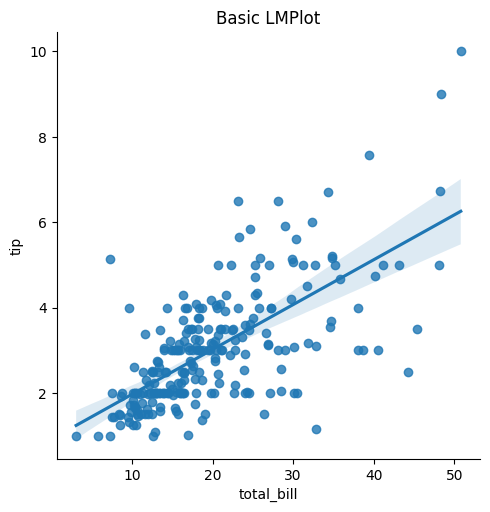

In [11]:
# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Basic linear regression plot
sns.lmplot(data=tips, x='total_bill', y='tip')
plt.title("Basic LMPlot")
plt.show()

**Customizing the LMPlot chart**

Seaborn's lmplot offers a rich set of customization options:

1. Adding Hue

The hue parameter allows us to differentiate and fit multiple regression lines based on a categorical variable

/home/halimia/miniconda3/envs/tf_pip_gpu_tuto/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/halimia/miniconda3/envs/tf_pip_gpu_tuto/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


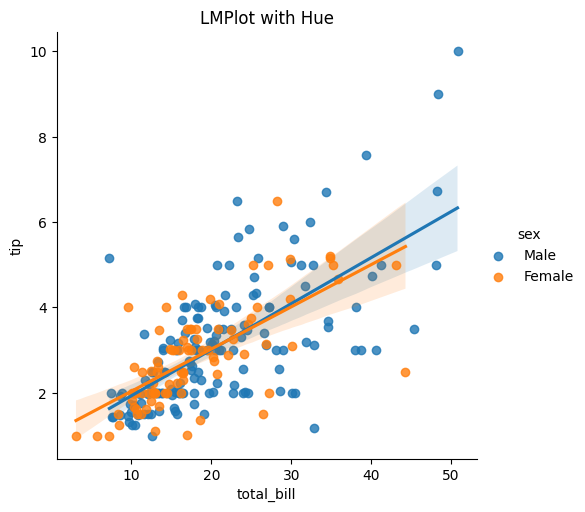

In [12]:
# LMPlot differentiated by gender
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex')
plt.title("LMPlot with Hue")
plt.show()

This fits separate regression lines for male and female diners, aiding in comparison.



2. Using Facets
   
Like relplot, lmplot also supports faceting. This means you can create a grid of plots based on categorical columns.

/home/halimia/miniconda3/envs/tf_pip_gpu_tuto/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/halimia/miniconda3/envs/tf_pip_gpu_tuto/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


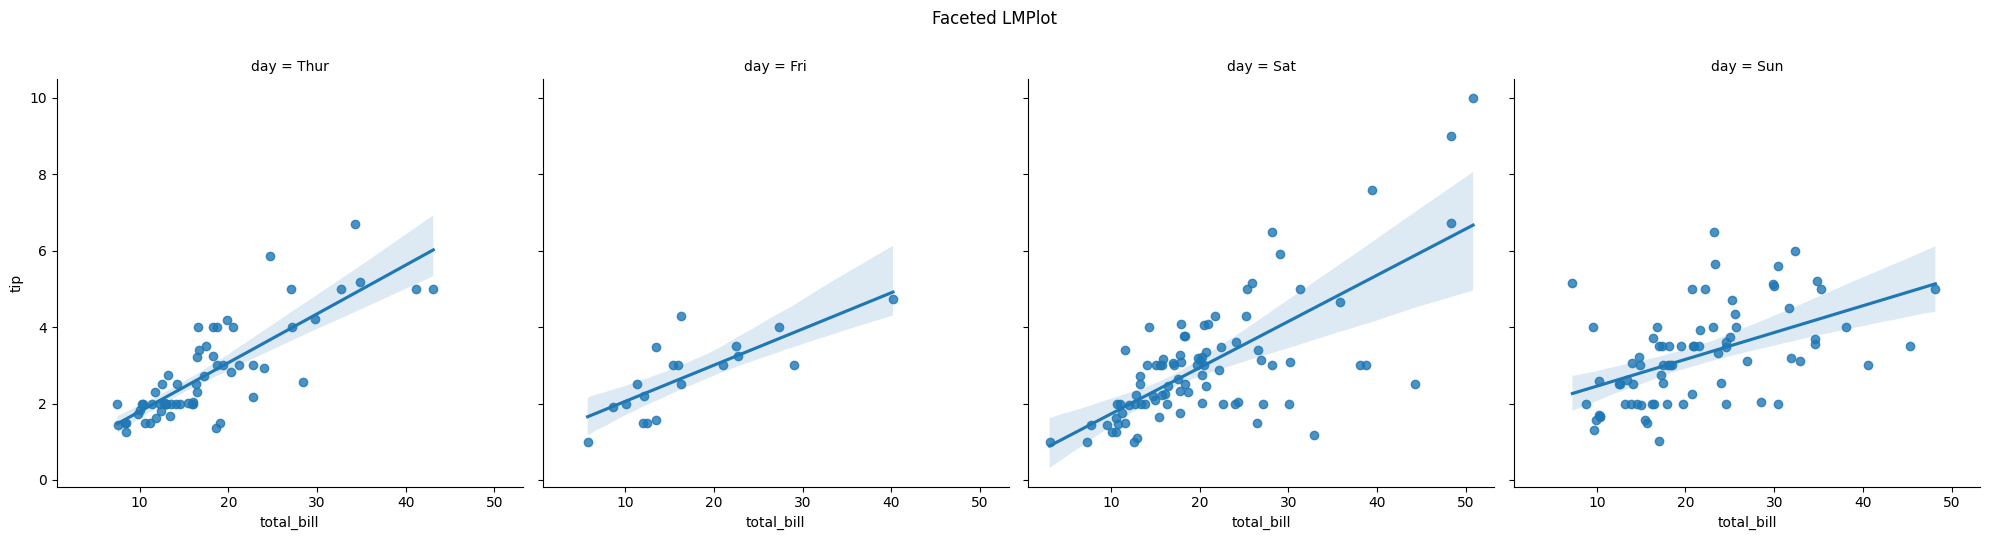

In [13]:
# LMPlot with facets for each day
sns.lmplot(data=tips, x='total_bill', y='tip', col='day')
plt.suptitle("Faceted LMPlot", y=1.07)
plt.show()

This creates separate regression plots for each day, making it easier to discern day-wise trends.

3. Modifying Aspect and Height
   
The aspect and height parameters allow you to control the size and aspect ratio of each facet.

/home/halimia/miniconda3/envs/tf_pip_gpu_tuto/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/halimia/miniconda3/envs/tf_pip_gpu_tuto/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


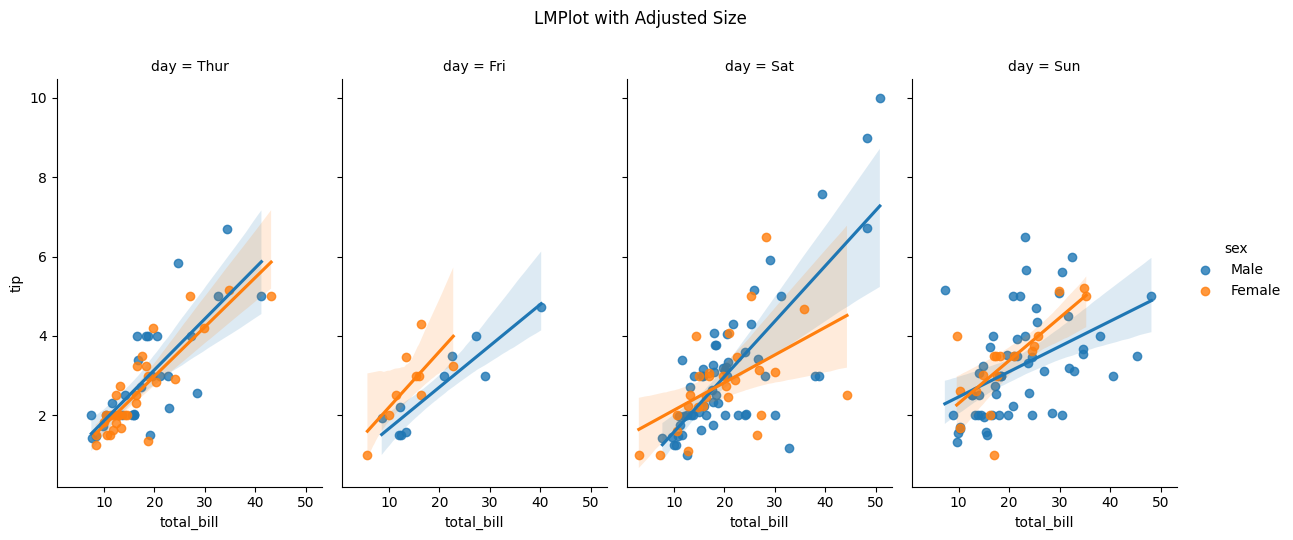

In [14]:
# Adjusting aspect ratio and height
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex', col='day', aspect=0.6, height=5)
plt.suptitle("LMPlot with Adjusted Size", y=1.07)
plt.show()

This generates narrower plots, which can be useful depending on your visualization requirements.

### 3.3. KDEPlot


**Introduction and use-cases**

KDEPlot stands for Kernel Density Estimate Plot. It provides a way to visualize the distribution of data in terms of its probability density. Essentially, it smoothens the distribution and provides a continuous curve, making it a great tool to observe the shape of the underlying data distribution.

Use-cases:

* Density Analysis: Observing the density and distribution of the data.
* Comparative Analysis: Comparing distributions across different categories or conditions.
* Outlier Identification: Identifying regions where data points are scarce or non-existent.

    



**Basic KDEPlot plot**

The primary purpose of the KDE plot is to visualize the distribution of a single variable.

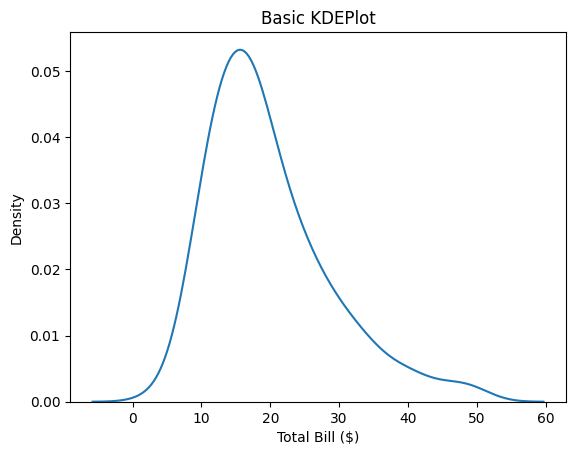

In [15]:
# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Basic KDE plot of the 'total_bill' column
sns.kdeplot(tips['total_bill'])
plt.title("Basic KDEPlot")
plt.xlabel("Total Bill ($)")
plt.ylabel("Density")
plt.show()

**Customizing the KDEPlot chart**

Seaborn's kdeplot offers several customization options to enhance the visualization:

1. Adding Shading
 
The shade parameter fills the area under the KDE curve.

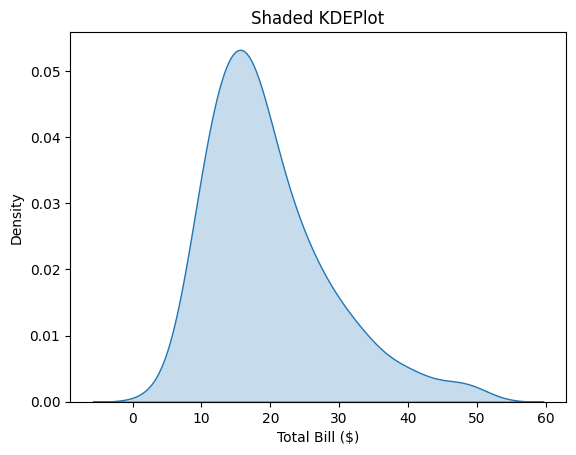

In [16]:
# KDE plot with shading
sns.kdeplot(tips['total_bill'], fill=True)
plt.title("Shaded KDEPlot")
plt.xlabel("Total Bill ($)")
plt.ylabel("Density")
plt.show()

2. Comparing Distributions
   
By plotting multiple KDE plots on the same axes, you can easily compare distributions.

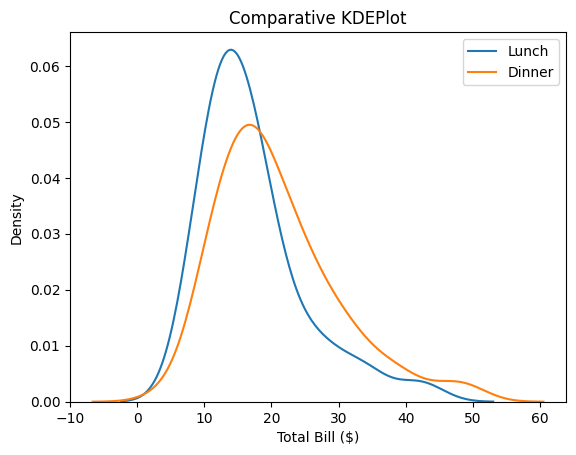

In [17]:
# Comparing distributions of 'total_bill' for lunch and dinner
sns.kdeplot(tips[tips['time'] == 'Lunch']['total_bill'], label='Lunch')
sns.kdeplot(tips[tips['time'] == 'Dinner']['total_bill'], label='Dinner')
plt.title("Comparative KDEPlot")
plt.xlabel("Total Bill ($)")
plt.ylabel("Density")
plt.legend()
plt.show()

This provides insights into how the total bills differ between lunch and dinner times.

3. Two-dimensional KDE

kdeplot can also plot a two-dimensional KDE, visualizing the joint distribution of two variables.

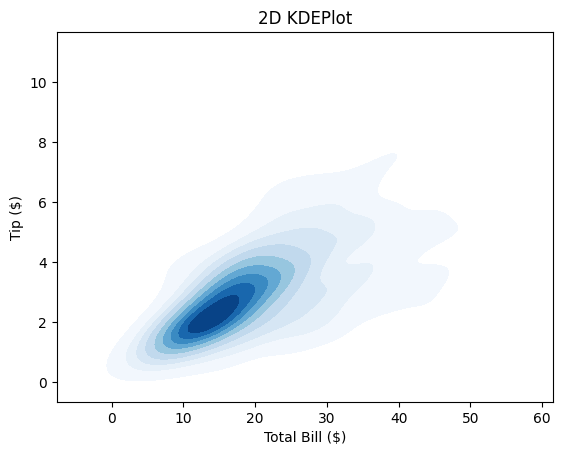

In [18]:
# 2D KDE plot of 'total_bill' and 'tip'
sns.kdeplot(data=tips, x='total_bill', y='tip', cmap="Blues", fill=True)
plt.title("2D KDEPlot")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.show()

This visualizes the joint distribution of total bills and tips.



In [19]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


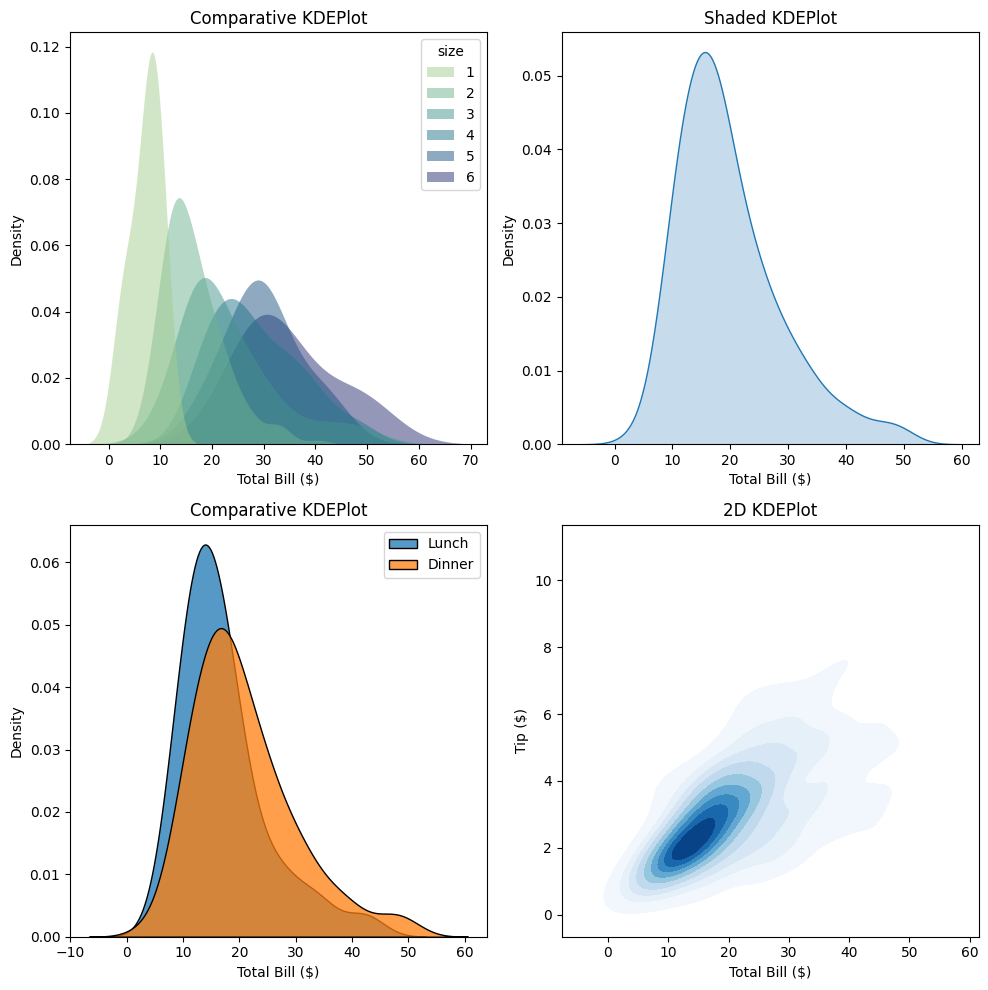

In [20]:
# Set up a 2x2 grid for different KDE plot customizations
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# KDE Plot 1: Basic KDE
# sns.kdeplot(tips['total_bill'], ax=axes[0, 0])
# axes[0, 0].set_title('Basic KDEPlot')
# axes[0, 0].set_xlabel("Total Bill ($)")
# axes[0, 0].set_ylabel("Density")

sns.kdeplot(
   data=tips, x="total_bill", hue="size",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,ax=axes[0, 0],
)
axes[0, 0].set_title('Comparative KDEPlot')
axes[0, 0].set_xlabel("Total Bill ($)")
axes[0, 0].set_ylabel("Density")

# KDE Plot 2: Shaded KDE
sns.kdeplot(tips['total_bill'], fill=True, ax=axes[0, 1])
axes[0, 1].set_title('Shaded KDEPlot')
axes[0, 1].set_xlabel("Total Bill ($)")
axes[0, 1].set_ylabel("Density")

# KDE Plot 3: Comparative KDE (Lunch vs. Dinner)
sns.kdeplot(tips[tips['time'] == 'Lunch']['total_bill'], label='Lunch', ax=axes[1, 0], multiple="stack")
sns.kdeplot(tips[tips['time'] == 'Dinner']['total_bill'], label='Dinner', ax=axes[1, 0], multiple="stack")
axes[1, 0].set_title("Comparative KDEPlot")
axes[1, 0].set_xlabel("Total Bill ($)")
axes[1, 0].set_ylabel("Density")
axes[1, 0].legend()

# KDE Plot 4: 2D KDE
sns.kdeplot(data=tips, x='total_bill', y='tip', cmap="Blues", fill=True, ax=axes[1, 1])
axes[1, 1].set_title("2D KDEPlot")
axes[1, 1].set_xlabel("Total Bill ($)")
axes[1, 1].set_ylabel("Tip ($)")

# Adjust layout and display
plt.tight_layout()
plt.show()

### 3.4. Clustermap  Chart

**Introduction and Use-Cases:**

A Clustermap in Seaborn combines a heatmap with dendrograms to help visualize the relationships in a matrix dataset. Essentially, before the data is visualized as a heatmap, it's hierarchically clustered, meaning that similar rows and columns are placed next to each other.

Use-cases:

* Biology: Often used in genomics to visualize patterns across gene expression data.
* Business: Understanding patterns of product usage or customer segments.
* General Data Analysis: Whenever you have a matrix of data and want to understand the relationships.


**Basic Clustermap chart**

**Using the Iris dataset**

The Iris dataset contains measurements of 150 iris flowers from three different species. It's a classic dataset for classification and clustering tasks in data science.

For the clustermap, we're interested in the four numerical columns: sepal length, sepal width, petal length, and petal width.

In [21]:
# Load the 'iris' dataset
iris = sns.load_dataset('iris')

# Drop the 'species' column to retain only numerical columns
iris_numerical = iris.drop('species', axis=1)
iris_numerical

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


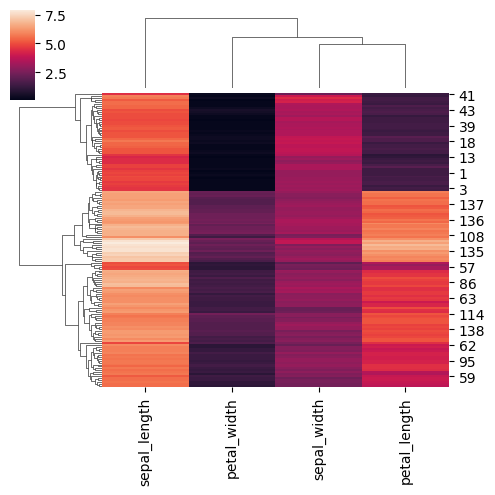

In [22]:
# Basic Clustermap plot
sns.clustermap(iris_numerical,figsize=(5, 5))
plt.show()

In the resulting plot, you'll see both rows and columns have been reordered to place similar items together. The dendrogram along the sides show the result of the hierarchical clustering.

**Customizing the Clustermap chart**

Seaborn allows a variety of customizations to tailor the clustermap to specific needs.



1. Adjusting the Color Palette
   
The default color palette might not always be appropriate or visually appealing. Changing the palette can make the visualization clearer.

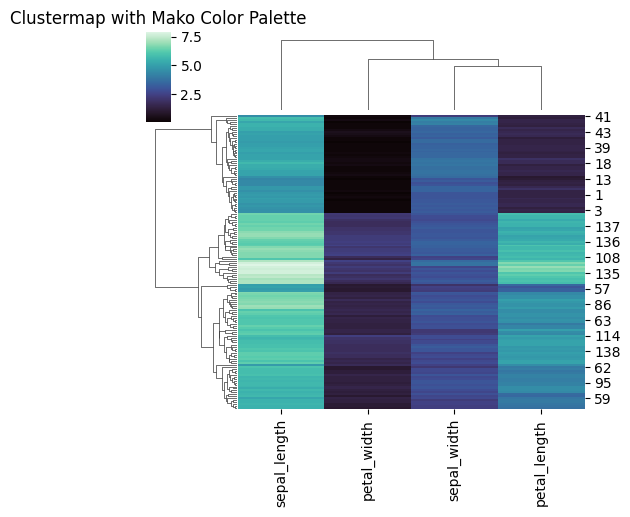

In [23]:
# Using the "mako" color palette
sns.clustermap(iris_numerical, cmap="mako",figsize=(5, 5))
plt.title('Clustermap with Mako Color Palette')
plt.show()

2. Standardizing the Data

Sometimes, the range of our data can vary a lot, making the heatmap hard to interpret. Standardizing the data scales it to have a mean of 0 and a variance of 1.

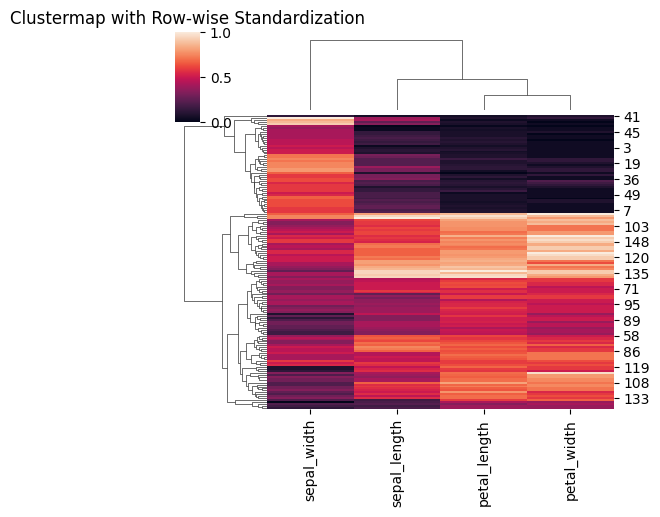

In [24]:
# Standardizing across rows (axis=1)
sns.clustermap(iris_numerical, standard_scale=1,figsize=(5, 5))
plt.title('Clustermap with Row-wise Standardization')
plt.show()

This makes sure that each feature (like sepal length or petal width) contributes equally to the clustering.

3. Different Clustering Methods

The method of clustering can impact the resulting dendrogram and order of rows/columns. The default method is 'average', but we can try others like 'single'.

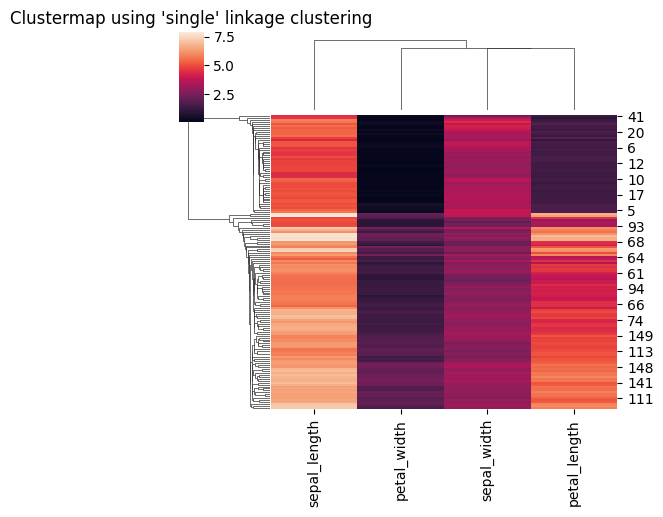

In [25]:
# Using 'single' linkage for clustering
sns.clustermap(iris_numerical, method='single',figsize=(5, 5))
plt.title("Clustermap using 'single' linkage clustering")
plt.show()

The 'single' method tends to create longer chains of clusters, whereas methods like 'complete' or 'average' tend to create more balanced clusters.


4. Different Distance Metrics

The distance metric determines how the "distance" between two rows is computed. The default metric is 'euclidean', but we can explore others like 'cosine'.

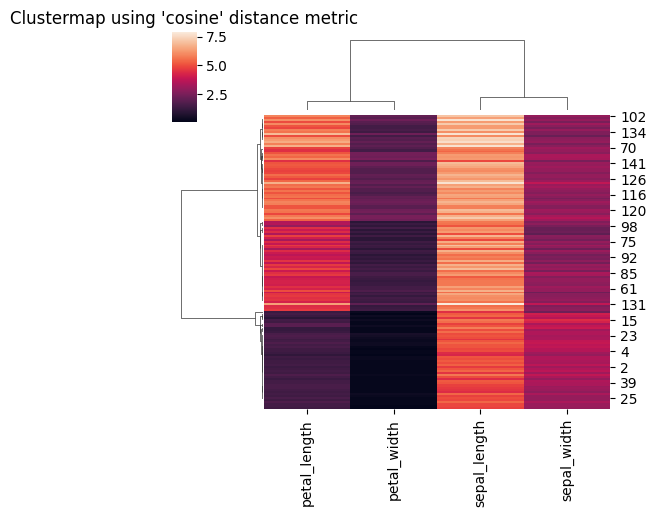

In [26]:
# Using 'cosine' distance metric
sns.clustermap(iris_numerical, metric='cosine',figsize=(5, 5))
plt.title("Clustermap using 'cosine' distance metric")
plt.show()

Different metrics can reveal different structures in the data. For instance, cosine distance can be more appropriate when the direction of the data matters more than the magnitudes.

### 3.5. FacetGrid Plot


**Introduction and use-cases**

A FacetGrid in Seaborn is a multi-plot grid for plotting conditional relationships. It's a way to visualize the distribution of a variable or the relationship between multiple variables within subsets of your dataset.
Use-cases for histograms include:

Use-cases:

* Comparative Analysis: To compare the distribution or relationship between variables across multiple subgroups.
* Multivariate Analysis: To understand patterns in datasets with multiple variables.
* Trends Across Groups: To visualize trends or behaviors across different categorical groups.
.

Using the tips dataset

The tips dataset contains information about people who had meals at a restaurant and the tips they gave. It has numerical variables like total_bill and tip, and categorical variables like day, time, and sex.

**Basic FacetGrid plot**

The primary purpose of a FacetGrid is to create a grid of subplots based on the values of one or more categorical variables.

/home/halimia/miniconda3/envs/tf_pip_gpu_tuto/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


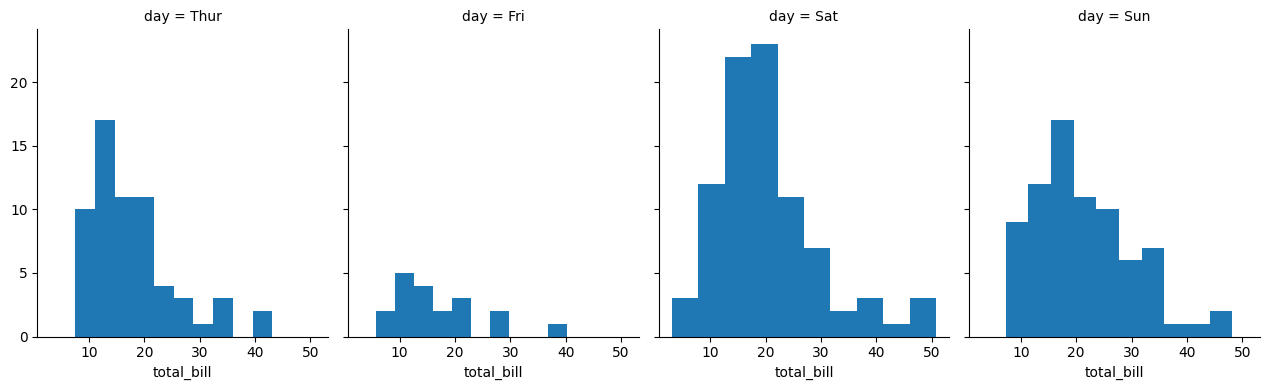

In [27]:
# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Create a FacetGrid object
# Here we'll visualize the distribution of `total_bill` across different `days`
# The height and aspect parameters control the size and aspect ratio of each facet.
g = sns.FacetGrid(tips, col="day", height=4, aspect=0.8)
g.map(plt.hist, "total_bill")

plt.show()

In the resulting plots, you'll see the distribution of total_bill for each day of the week separately.

**Customizing FacetGrid:**

Seaborn allows for a variety of customizations to tailor the FacetGrid to specific needs.

1. Multiple Variables
You can use both row and col parameters to create a grid of plots based on two categorical variables.

/home/halimia/miniconda3/envs/tf_pip_gpu_tuto/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


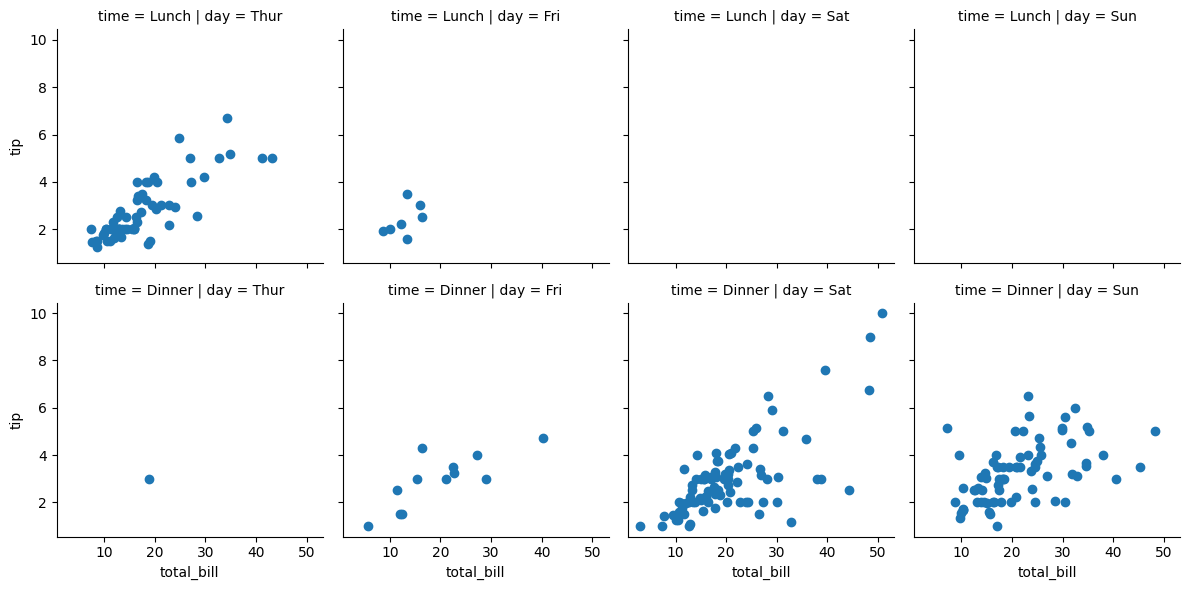

In [28]:
# Visualizing the relationship between `total_bill` and `tip` for different `days` and `times`
g = sns.FacetGrid(tips, col="day", row="time")
g.map(plt.scatter, "total_bill", "tip")

plt.show()

This provides a clear view of how tipping behavior changes across different days and meal times.

2. Using Hue

You can add a third dimension using color (hue).

/home/halimia/miniconda3/envs/tf_pip_gpu_tuto/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


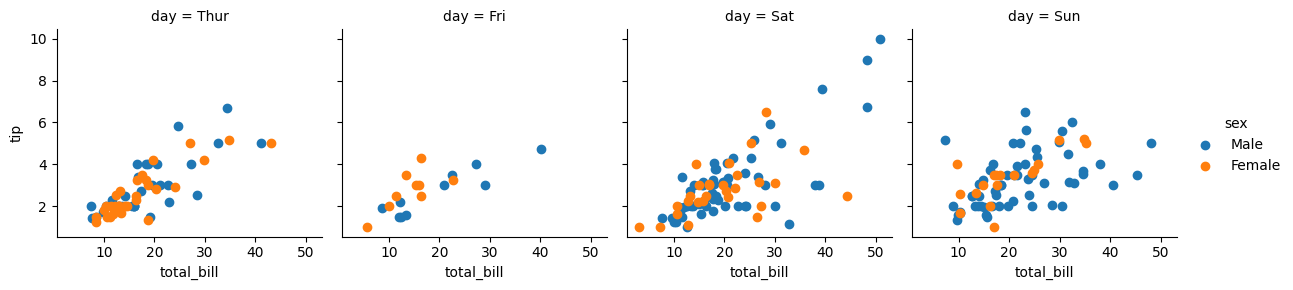

In [29]:
# Visualizing the relationship between `total_bill` and `tip` using `sex` as the hue
g = sns.FacetGrid(tips, col="day", hue="sex")
g.map(plt.scatter, "total_bill", "tip").add_legend()

plt.show()

The legend provides information about the colors, helping in distinguishing between male and female customers.

### 3.6. Catplot Plot

**Introduction and use-cases**

Catplot in Seaborn is a figure-level function used to create categorical scatter plots. It provides a high-level interface to draw attractive visualizations for categorical data and can utilize several axes-level functions like stripplot, boxplot, swarmplot, etc., making it versatile and useful.

Use-cases:

* Distributions within Categories: Visualizing the distribution of data points within categories.
* Comparative Analysis: Comparing data across different categories.
* Trend Visualization: Observing trends or anomalies in categorical data.


**Basic Catplot chart**

/home/halimia/miniconda3/envs/tf_pip_gpu_tuto/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


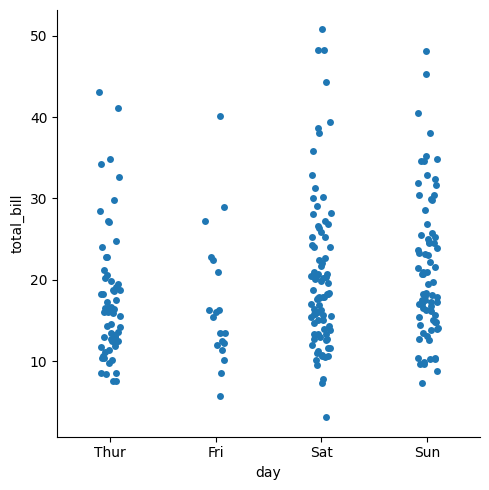

In [30]:
# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Basic catplot using the 'strip' kind
sns.catplot(data=tips, x='day', y='total_bill', kind='strip')

plt.show()

**Customizing catplot charts**:

Seaborn's catplot provides multiple ways to customize and enhance the visualization:

1. Different Kinds of Plots
The kind parameter allows us to choose the kind of plot. Let's demonstrate a few:

/home/halimia/miniconda3/envs/tf_pip_gpu_tuto/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


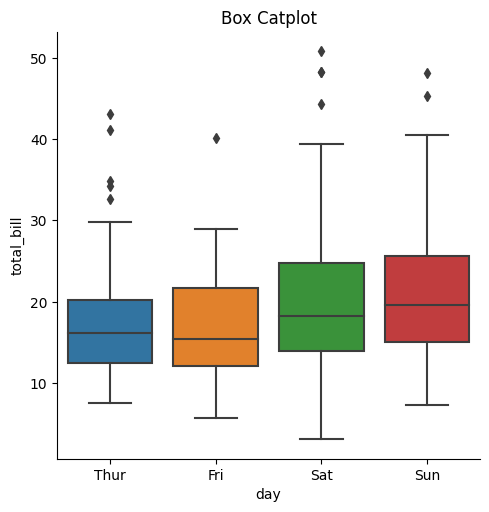

/home/halimia/miniconda3/envs/tf_pip_gpu_tuto/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


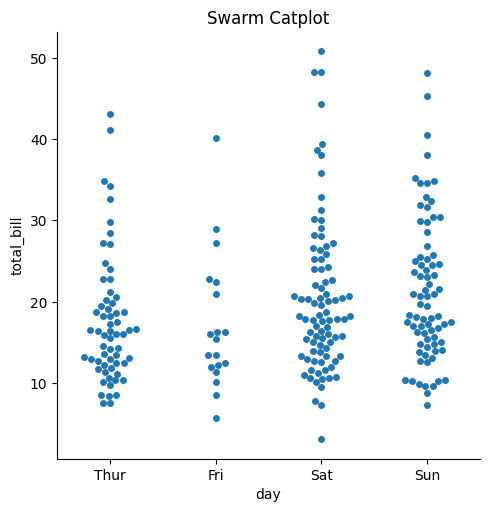

In [31]:
# Using 'box' kind to show the distribution of total_bill for each day
sns.catplot(data=tips, x='day', y='total_bill', kind='box')
plt.title("Box Catplot")
plt.show()

# Using 'swarm' kind to prevent data point overlap
sns.catplot(data=tips, x='day', y='total_bill', kind='swarm')
plt.title("Swarm Catplot")
plt.show()

2. Using Hue
The hue parameter adds another categorical variable for more detailed comparison.

/home/halimia/miniconda3/envs/tf_pip_gpu_tuto/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


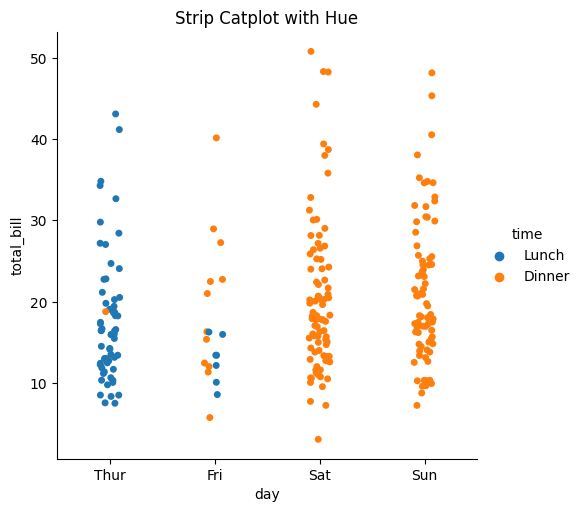

In [32]:
# Using 'hue' to differentiate between time of day
sns.catplot(data=tips, x='day', y='total_bill', kind='strip', hue='time')
plt.title("Strip Catplot with Hue")
plt.show()

This helps in visualizing the distribution of total_bill for lunch and dinner across different days.

3. Adjusting the orientation
By default, the categorical axis is horizontal. But it can be made vertical using the orient parameter.

/home/halimia/miniconda3/envs/tf_pip_gpu_tuto/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


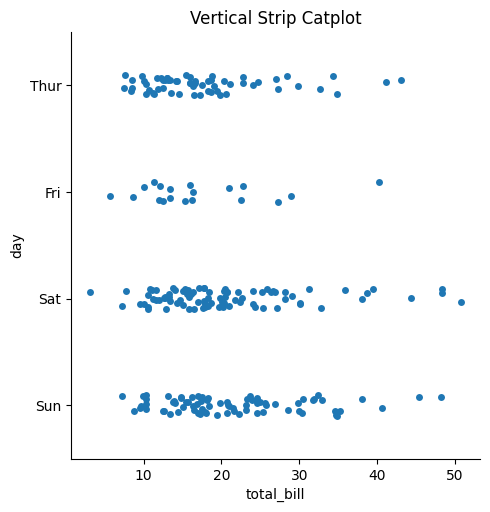

In [33]:
# Changing orientation to vertical
sns.catplot(data=tips, x='total_bill', y='day', kind='strip', orient='h')
plt.title("Vertical Strip Catplot")
plt.show()

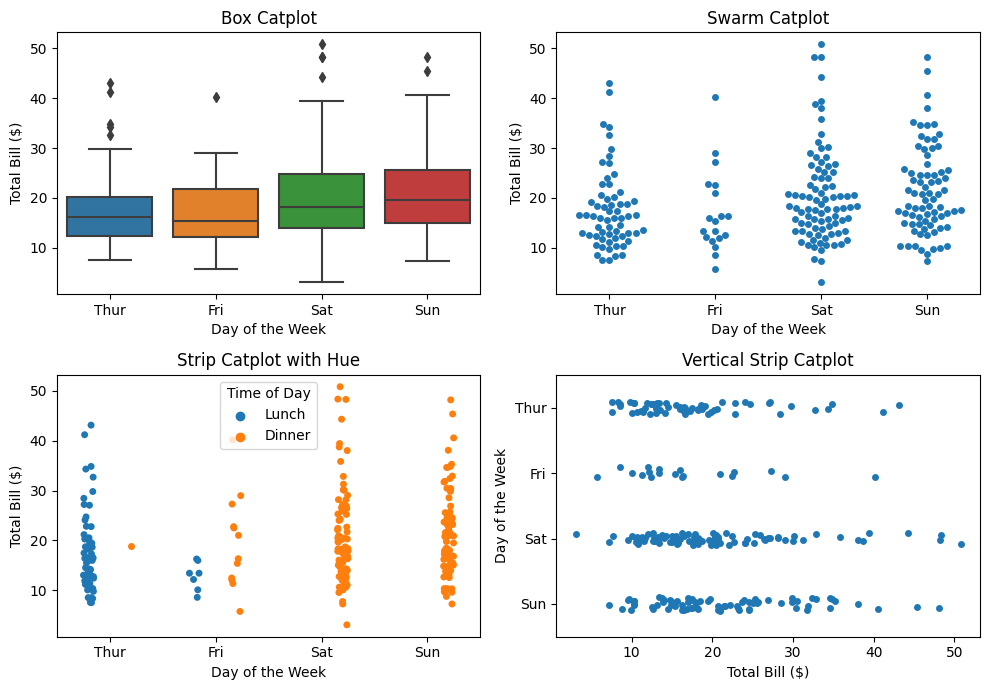

In [34]:
# Set up a 2x2 grid for the different types of categorical plots.
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# --- Plot 1: Box Catplot ---
# The boxplot provides a summary of a set of data values through their quartiles.
# It shows properties like minimum, first quartile, median, third quartile, and maximum.
sns.boxplot(data=tips, x='day', y='total_bill', ax=axes[0, 0])
axes[0, 0].set_title("Box Catplot")
axes[0, 0].set_xlabel("Day of the Week")
axes[0, 0].set_ylabel("Total Bill ($)")

# --- Plot 2: Swarm Catplot ---
# A swarmplot is similar to a stripplot, but data points are adjusted so they don't overlap.
# This provides a better representation of the distribution of values.
sns.swarmplot(data=tips, x='day', y='total_bill', ax=axes[0, 1])
axes[0, 1].set_title("Swarm Catplot")
axes[0, 1].set_xlabel("Day of the Week")
axes[0, 1].set_ylabel("Total Bill ($)")

# --- Plot 3: Strip Catplot with Hue ---
# The stripplot is a scatter plot where one of the variables is categorical. 
# By introducing the 'hue' parameter, we can differentiate data points based on another category.
sns.stripplot(data=tips, x='day', y='total_bill', hue='time', dodge=True, ax=axes[1, 0])
axes[1, 0].set_title("Strip Catplot with Hue")
axes[1, 0].set_xlabel("Day of the Week")
axes[1, 0].set_ylabel("Total Bill ($)")
axes[1, 0].legend(title='Time of Day')

# --- Plot 4: Vertical Strip Catplot ---
# The orientation of the stripplot can be changed, here we showcase a vertical variation.
sns.stripplot(data=tips, x='total_bill', y='day', orient='h', ax=axes[1, 1])
axes[1, 1].set_title("Vertical Strip Catplot")
axes[1, 1].set_xlabel("Total Bill ($)")
axes[1, 1].set_ylabel("Day of the Week")

# Adjust layout for better visualization.
plt.tight_layout()
plt.show()

### 3.7. Relplot Plot

**Introduction and use-cases**

Relplot is a figure-level function in Seaborn that provides a high-level interface for drawing attractive statistical visualizations, primarily scatter plots and line plots. "Rel" in relplot stands for "relational". This function is built on top of scatterplot and lineplot and provides facets to easily create a grid of plots.

Use-cases:

* Comparative Analysis: Comparing two numerical variables.
* Trend Visualization: Observing trends in numerical data over a category or time.
* Multivariate Analysis: When you want to visualize the relationship between two variables while also distinguishing between subsets of your data.

**Basic Relplot plot**

/home/halimia/miniconda3/envs/tf_pip_gpu_tuto/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


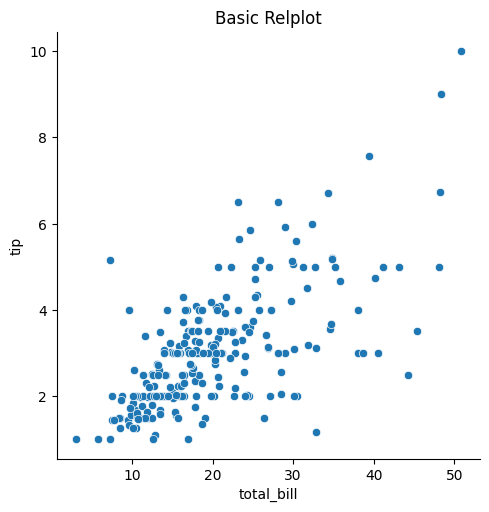

In [35]:
# Load the 'tips' dataset
tips = sns.load_dataset('tips')

sns.relplot(data=tips, x='total_bill', y='tip')
plt.title("Basic Relplot")
plt.show()

**Customizing Relplot**
.

1. Different Kinds of Plots

The kind parameter helps us choose between scatter and line plots.

/home/halimia/miniconda3/envs/tf_pip_gpu_tuto/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


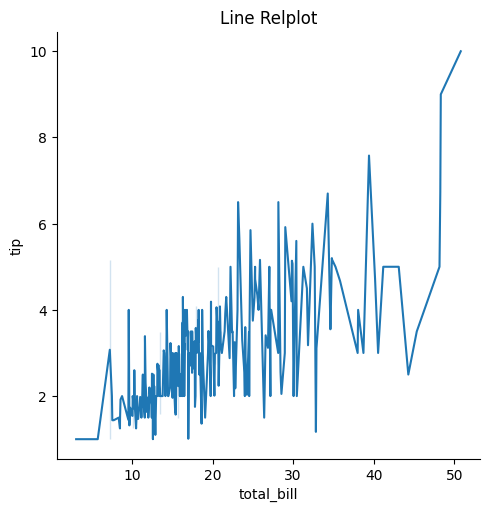

In [36]:
# Line plot using relplot
sns.relplot(data=tips, x='total_bill', y='tip', kind='line')
plt.title("Line Relplot")
plt.show()

2. Using Hue and Style

The hue and style parameters can modify the colors and markers respectively based on categorical data.

/home/halimia/miniconda3/envs/tf_pip_gpu_tuto/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


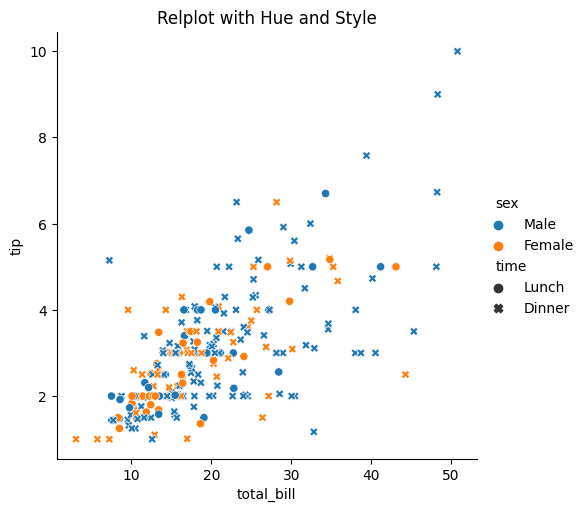

In [37]:
# Scatter relplot with hue and style differentiation
sns.relplot(data=tips, x='total_bill', y='tip', hue='sex', style='time')      
plt.title("Relplot with Hue and Style")
plt.show()

This differentiates the data points based on gender (color) and mealtime (marker style).

3. Using Facets
   
Facets allow us to create a grid of plots based on categorical columns, aiding in the comparison across categories.

/home/halimia/miniconda3/envs/tf_pip_gpu_tuto/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


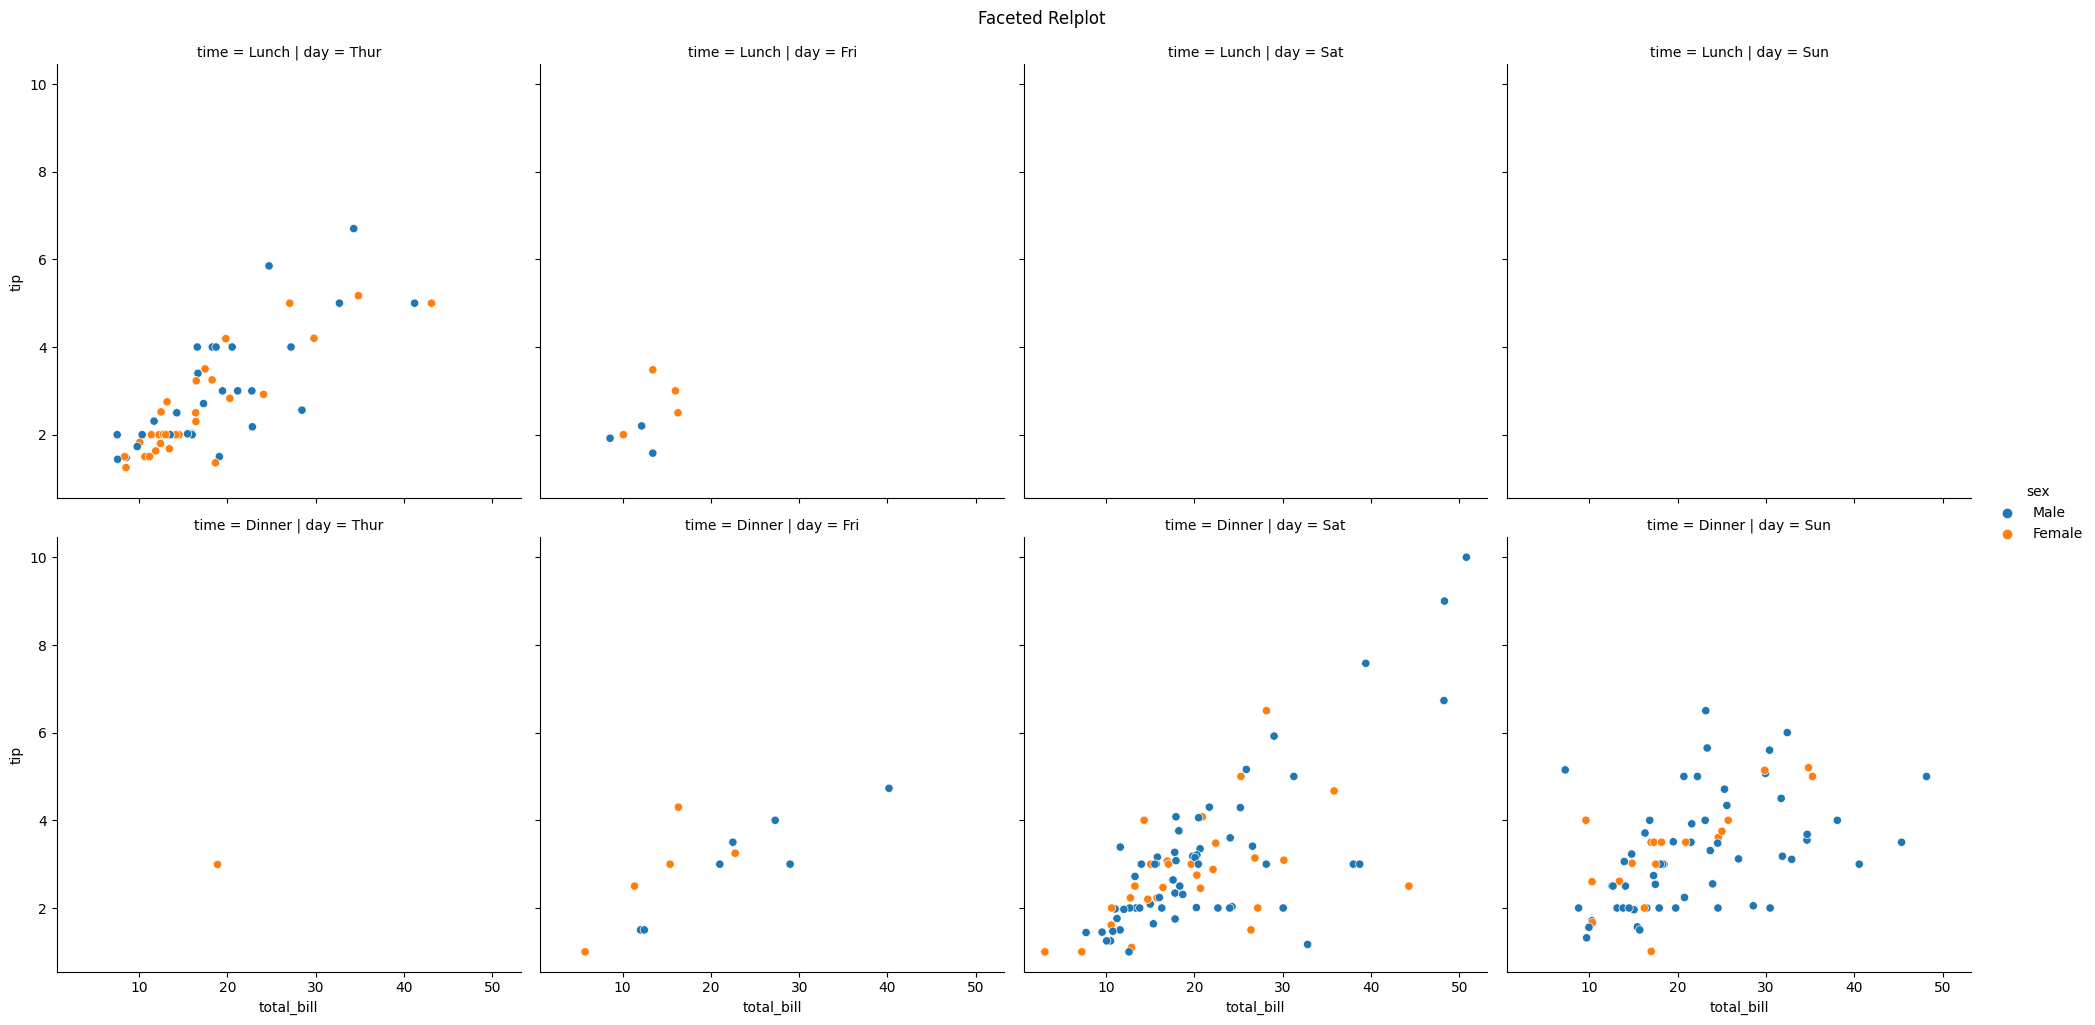

In [38]:
# Scatter relplot with row-wise facets for time of meal
sns.relplot(data=tips, x='total_bill', y='tip', hue='sex', col='day', row='time')
plt.suptitle("Faceted Relplot", y=1.02)
plt.show()

# 5. The Interplay between Seaborn and Matplotlib


## 5.1. Key Differences between Seaborn and Matplotlib (5 mins)

- **Level of Abstraction**:
  - Matplotlib provides a low-level interface that offers lots of flexibility at the cost of more verbosity.
  - Seaborn, on the other hand, provides a high-level interface which is data-aware, making it easier to generate complex visualizations with concise code.
  
- **Aesthetics**:
  - Seaborn comes with several beautiful themes and color palettes that can enhance the presentation of data instantly.
  - While Matplotlib also has styles, Seaborn's are more modern and visually appealing out of the box.
  
- **Data Structures**:
  - Seaborn natively understands Pandas DataFrames, making it easier to plot data directly from CSVs or databases.
  - Matplotlib can plot Pandas DataFrames, but doesn't "understand" them as intuitively as Seaborn.

- **Flexibility**:
  - Matplotlib is more flexible and can be used for custom plots, tweaking Seaborn outputs, or even embedding plots in GUI applications.
  - Seaborn is primarily focused on statistical plotting and may not be suitable for more niche or specialized plotting tasks.

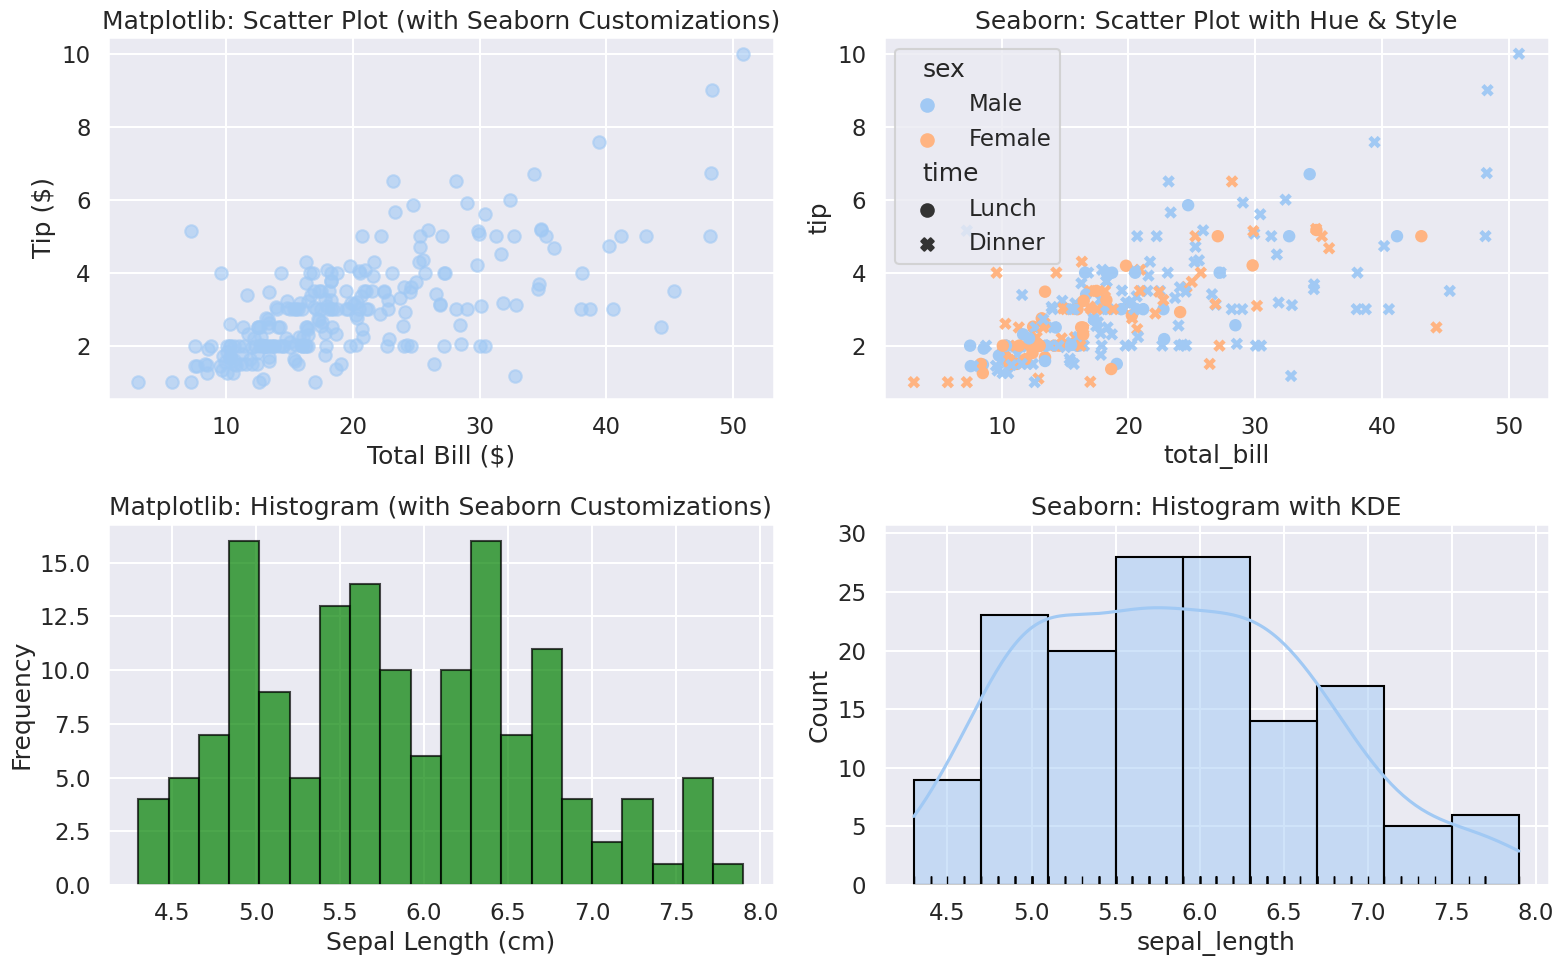

In [39]:
# Load datasets
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

# Seaborn customizations
sns.set_style("darkgrid")  # Set theme
sns.set_palette("pastel")   # Set color palette
sns.set_context("talk", font_scale=1)  # Set context and scale up fonts slightly

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# --- Scatter Plots: `tips` dataset ---

# Matplotlib scatter plot (this will now use Seaborn's customizations)
axes[0, 0].scatter(tips['total_bill'], tips['tip'], alpha=0.6)
axes[0, 0].set_title('Matplotlib: Scatter Plot (with Seaborn Customizations)')
axes[0, 0].set_xlabel('Total Bill ($)')
axes[0, 0].set_ylabel('Tip ($)')

# Seaborn scatter plot
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', style='time', ax=axes[0, 1], edgecolor='none', s=80)
axes[0, 1].set_title('Seaborn: Scatter Plot with Hue & Style')

# --- Histograms: `iris` dataset ---

# Matplotlib histogram (this will also use Seaborn's customizations)
axes[1, 0].hist(iris['sepal_length'], bins=20,color= 'green', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Matplotlib: Histogram (with Seaborn Customizations)')
axes[1, 0].set_xlabel('Sepal Length (cm)')
axes[1, 0].set_ylabel('Frequency')

# Seaborn histogram with KDE
sns.histplot(data=iris, x='sepal_length', kde=True, ax=axes[1, 1], edgecolor='black')
axes[1, 1].set_title('Seaborn: Histogram with KDE')
# Adding the rug plot separately
sns.rugplot(data=iris, x='sepal_length', ax=axes[1, 1], color='black')

# Adjust the layout
plt.tight_layout()
plt.show()

1. In the scatter plot of the tips dataset:

* The Matplotlib version provides a basic scatter plot.
* The Seaborn version, with just a couple of extra parameters (hue and style), differentiates between male and female and lunch and dinner times, making the plot more informative.

2. In the histogram of the iris dataset:

* The Matplotlib version provides a basic histogram.
* The Seaborn version, with the addition of a Kernel Density Estimation (KDE) and rug plot, gives a richer representation of the distribution.

This comparison is intended to showcase that while both libraries can achieve similar visualizations, Seaborn provides an easier and more concise way to produce more informative plots. However, Matplotlib's strength lies in its flexibility and control over every aspect of the plot, making it more suitable for custom visualizations.

## 5.2. When to Use Which? Advantages of Seaborn 

- **Complex Statistical Plots**: For plots that involve multiple groups and summarizations (like box plots, violin plots, pair plots), Seaborn's data-aware functions can generate them with fewer lines of code.
  
- **Default Themes**: If you want to quickly make your plots look polished, Seaborn provides many default themes and color palettes that integrate well with the data-aware plotting functions.
  
- **Heatmaps, Regression Lines, Distributions**: While possible in Matplotlib, Seaborn simplifies the creation of certain plots like heatmaps, regression line plots, or distribution plots.

